In [1]:

import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.utils import load_img
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import shutil
import tqdm

In [2]:
print(Image.__version__)

11.1.0


In [3]:

loaded_model = keras.saving.load_model("resnet50_pretrained_not-frozen.keras")
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │        10,245 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,687,633 (269.65 MB)

 Trainable params: 23,544,837 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,089,676 (179.63 MB)

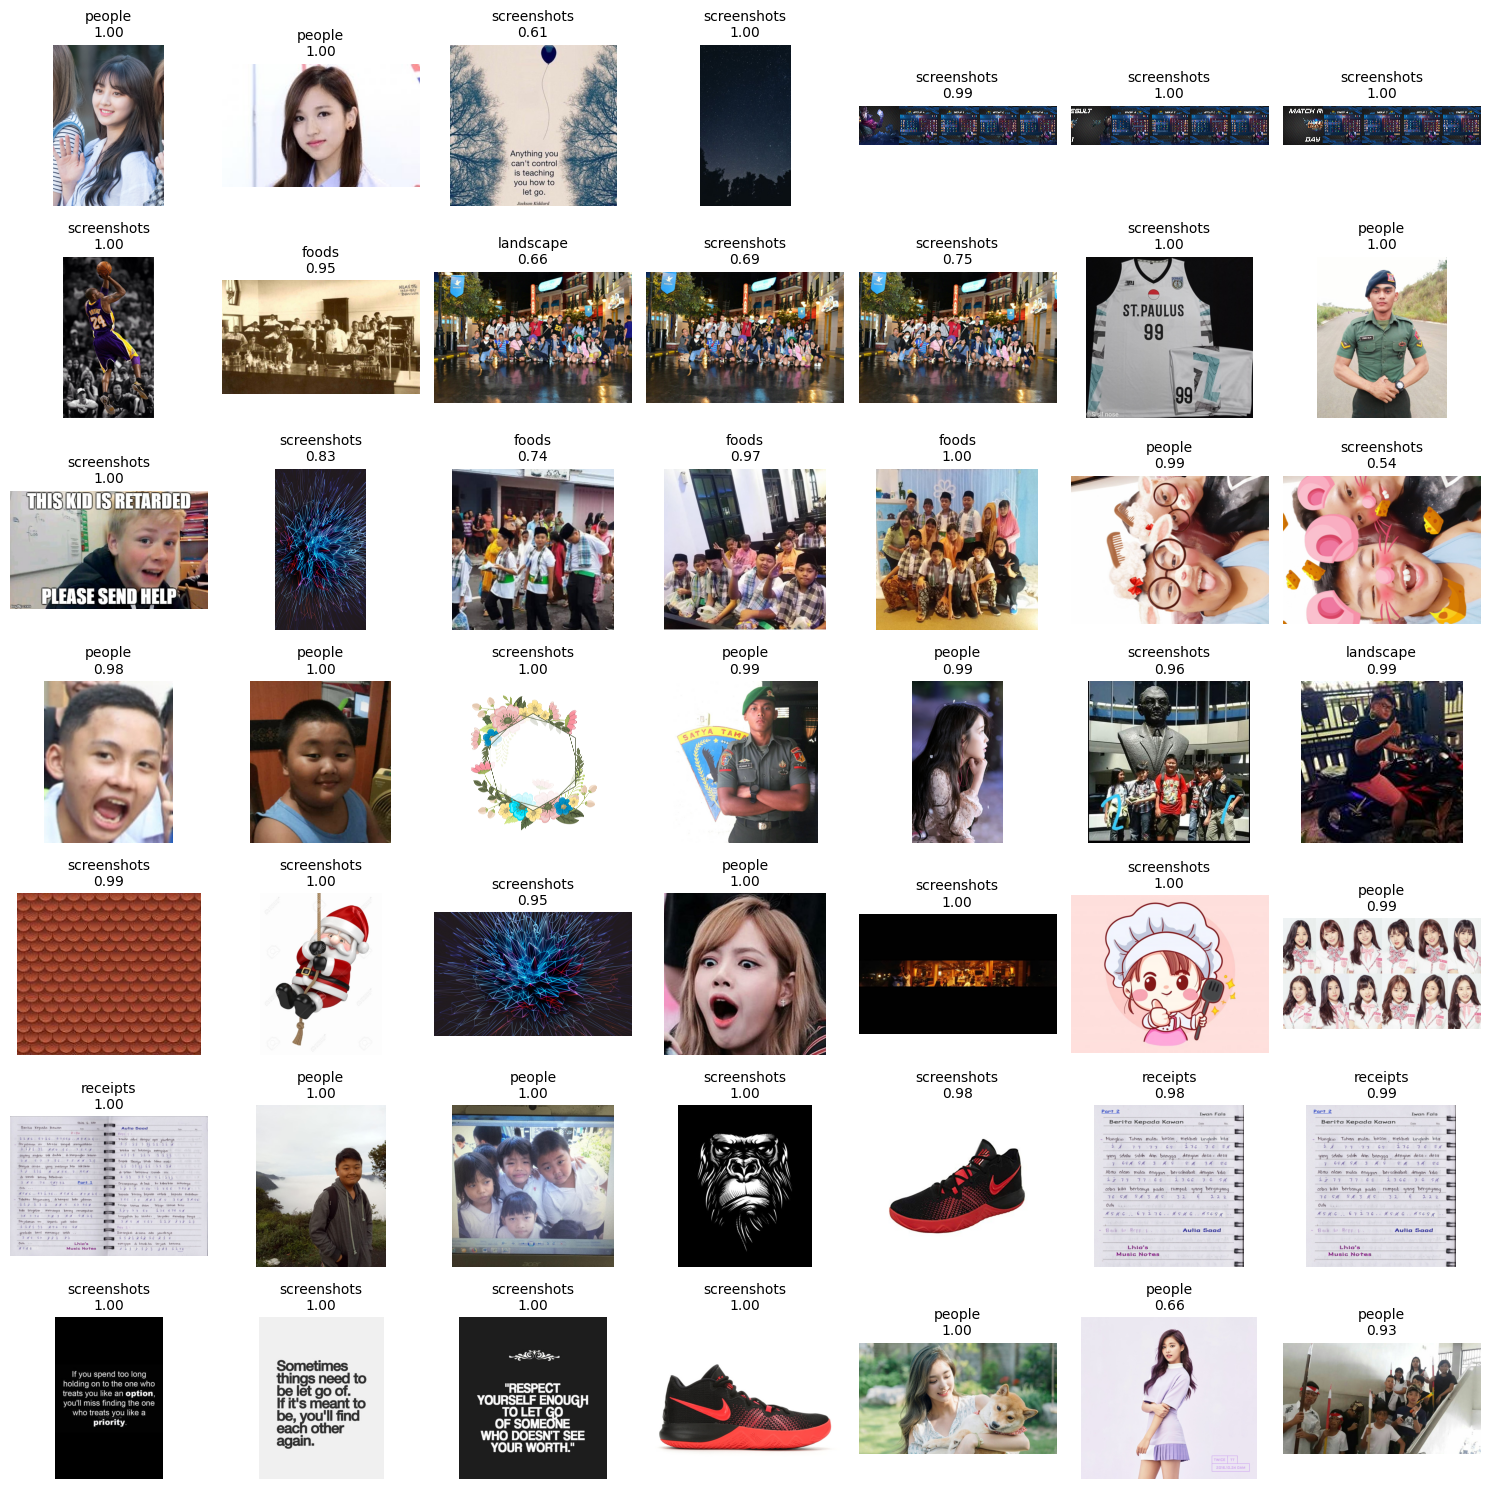

In [4]:
gallery_path = "C:/Users/2ndro/OneDrive/Pictures/testing"

# Get image files
image_files = [f for f in os.listdir(gallery_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Calculate rows and columns for display
num_images = len(image_files)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

# Create figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten() if rows > 1 or cols > 1 else [axes]

# Class labels
labels = ["foods", "landscape", "people", "receipts", "screenshots"]

# Process and predict each image
for i, img_file in enumerate(image_files):
    if i >= len(axes):
        break
        
    # Load and preprocess image
    img_path = os.path.join(gallery_path, img_file)
    img = load_img(img_path)
    
    # Display original image
    axes[i].imshow(img)
    axes[i].axis('off')
    
    # Preprocess for model
    img_array = img_to_array(img)
    img_resized = tf.image.resize(img_array, (224, 224))
    img_normalized = img_resized / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)
    
    # Make prediction
    prediction = loaded_model.predict(img_batch, verbose=0)
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Set title with prediction
    axes[i].set_title(f"{predicted_class}\n{confidence:.2f}", fontsize=10)

# Hide empty subplots
for j in range(num_images, len(axes)):
    axes[j].axis('off')
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

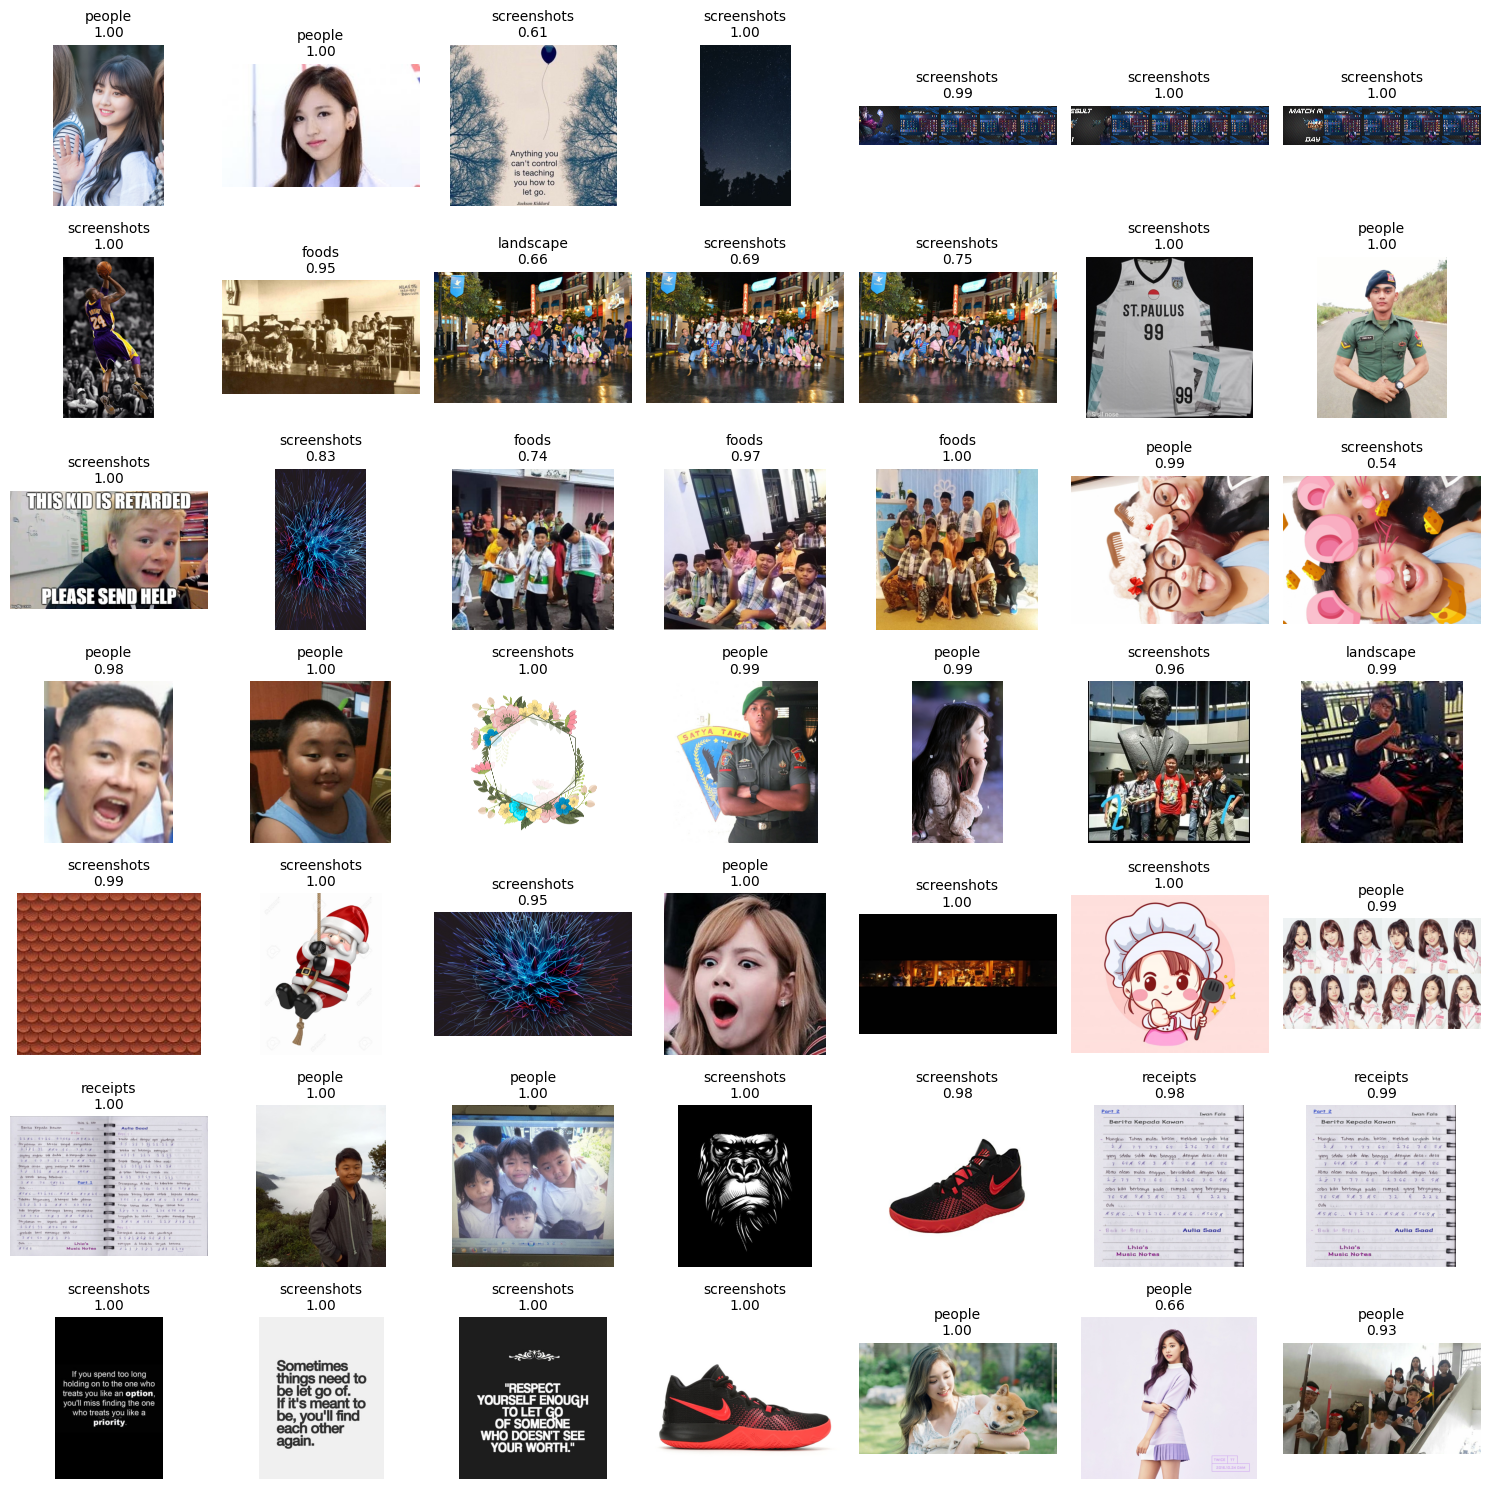

In [5]:
gallery_path = "C:/Users/2ndro/OneDrive/Pictures/testing"

# Get image files
image_files = [f for f in os.listdir(gallery_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Calculate rows and columns for display
num_images = len(image_files)
rows = int(np.ceil(np.sqrt(num_images)))
cols = int(np.ceil(num_images / rows))

# Create figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten() if rows > 1 or cols > 1 else [axes]

# Class labels
labels = ["foods", "landscape", "people", "receipts", "screenshots"]

# Process and predict each image
for i, img_file in enumerate(image_files):
    if i >= len(axes):
        break
        
    # Load and preprocess image
    img_path = os.path.join(gallery_path, img_file)
    img = load_img(img_path)
    
    # Display original image
    axes[i].imshow(img)
    axes[i].axis('off')
    
    # Preprocess for model
    img_array = img_to_array(img)
    img_resized = tf.image.resize(img_array, (224, 224))
    img_normalized = img_resized / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)
    
    # Make prediction
    prediction = loaded_model.predict(img_batch, verbose=0)
    predicted_class = labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    # Set title with prediction
    axes[i].set_title(f"{predicted_class}\n{confidence:.2f}", fontsize=10)

# Hide empty subplots
for j in range(num_images, len(axes)):
    axes[j].axis('off')
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [6]:
def classify_and_sort_images(source_folder_path, loaded_model):
    # Class labels
    labels = ["foods", "landscape", "people", "receipts", "screenshots"]
    
    # Create destination folders if they don't exist
    for label in labels:
        dest_path = os.path.join(source_folder_path, label)
        if not os.path.exists(dest_path):
            os.makedirs(dest_path)
    
    # Get image files
    image_files = [f for f in os.listdir(source_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    total_images = len(image_files)
    
    # Import tqdm for progress bar
    from tqdm import tqdm
    
    # Process and predict each image with progress bar
    for i, img_file in enumerate(tqdm(image_files, desc="Classifying images", unit="image")):
        # Skip processing if file is in a subfolder
        if os.path.dirname(img_file):
            continue
            
        # Load and preprocess image
        img_path = os.path.join(source_folder_path, img_file)
        img = load_img(img_path)
        
        # Preprocess for model
        img_array = img_to_array(img)
        img_resized = tf.image.resize(img_array, (224, 224))
        img_normalized = img_resized / 255.0
        img_batch = np.expand_dims(img_normalized, axis=0)
        
        # Make prediction
        prediction = loaded_model.predict(img_batch, verbose=0)
        predicted_class = labels[np.argmax(prediction)]
        
        # Move the image to corresponding folder
        dest_path = os.path.join(source_folder_path, predicted_class, img_file)
        shutil.copy(img_path, dest_path)
    
    return total_images

In [11]:
# Example usage
# folder_path = "C:/Users/2ndro/OneDrive/Pictures/testing"
folder_path = "C:/Users/2ndro/OneDrive/Pictures/testing"
num_sorted = classify_and_sort_images(folder_path, loaded_model)
print(f"Sorted {num_sorted} images into category folders")

Classifying images: 100%|██████████| 49/49 [00:11<00:00,  4.45image/s]

Sorted 49 images into category folders
